In [16]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
from scipy import interpolate,stats

# Operando com gasolina C

In [17]:
df_ensaio = pd.read_csv("Dados_do_Ensaio_do_Grupo_Gerador_G1300P.csv")

df_ensaio.head()

df_ensaio.massa_g *= -1 

df_ensaio.massa_g -= 4

In [18]:
df_ensaio.describe()


,P_atm_mbar,Temp_amb_Celsius,hum_rela_ar,Pot_W,ruido_dB,Frequencia_Hz,Tensao_V,Temp_esc_Celsius,tempo_s,massa_g
count,39.0,3.900000e+01,39.0,39.000000,39.00000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,913.0,2.460000e+01,74.0,233.333333,92.60000,61.033333,101.666667,269.666667,180.000000,16.641026
std,0.0,1.439663e-14,0.0,229.431028,1.05606,0.208167,0.477567,29.388803,113.717101,11.242511
min,913.0,2.460000e+01,74.0,0.000000,91.50000,60.800000,101.000000,243.000000,0.000000,0.000000
25%,913.0,2.460000e+01,74.0,0.000000,91.50000,60.800000,101.000000,243.000000,90.000000,7.500000
50%,913.0,2.460000e+01,74.0,160.000000,92.30000,61.000000,102.000000,256.000000,180.000000,16.000000
75%,913.0,2.460000e+01,74.0,540.000000,94.00000,61.300000,102.000000,310.000000,270.000000,25.000000
max,913.0,2.460000e+01,74.0,540.000000,94.00000,61.300000,102.000000,310.000000,360.000000,42.000000


In [19]:
df_dict = {}

Pot_list = ['0','160','540']

for pot in Pot_list:

    df_dict[pot] = df_ensaio[df_ensaio['Pot_W'] == float(pot)]


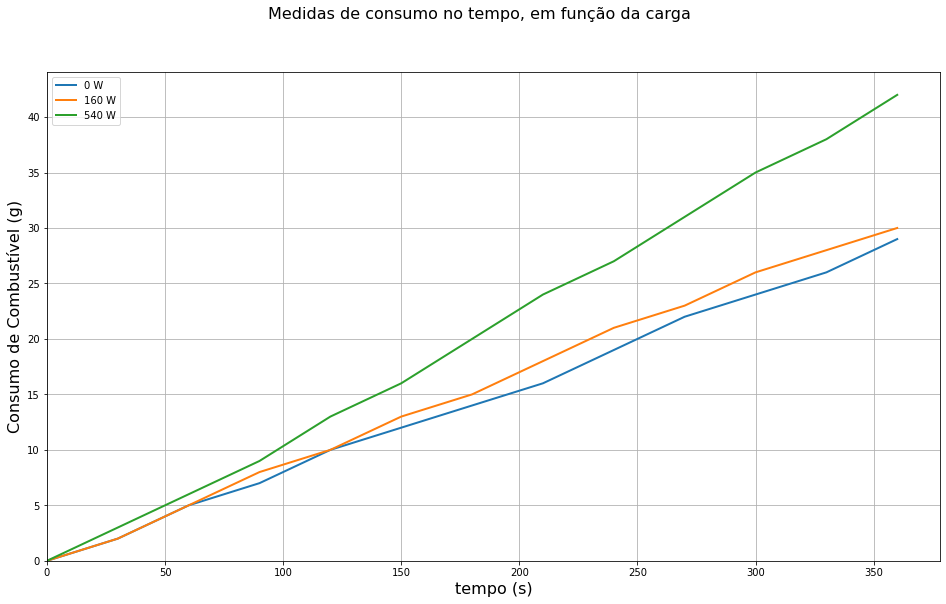

In [20]:
fig = plt.figure(figsize=[16, 9])
fig.suptitle('Medidas de consumo no tempo, em função da carga', fontsize=16)
# Plotando 2D

ax = fig.add_subplot(1, 1, 1)

ax.set_ylabel('Consumo de Combustível (g)', fontsize=16)
ax.set_xlabel('tempo (s)', fontsize=16)

for key in df_dict:

        df = df_dict[key]

        ax.plot(df.tempo_s, df.massa_g, linewidth=2,label='{} W'.format(key))

ax.grid()
ax.legend()
ax.set_xlim(0)
ax.set_ylim(0)

plt.show()
fig.savefig('Figures/Consumo.png', bbox_inches='tight')


# Operando com E27 afogado

In [21]:
df_ensaio_2 = pd.read_csv("ETANOL_Dados_do_Ensaio_do_Grupo_Gerador_G1300P.csv")

df_ensaio_2.head()


,P_atm_mbar,Temp_amb_Celsius,hum_rela_ar,Pot_W,ruido_dB,Frequencia_Hz,Tensao_V,Temp_esc_Celsius,tempo_s,massa_g
0,910,25.1,61,548,97.8,59.1,107,247,0,-5
1,910,25.1,61,548,97.8,59.1,107,247,60,-15
2,910,25.1,61,548,97.8,59.1,107,247,120,-25
3,910,25.1,61,548,97.8,59.1,107,247,180,-37
4,910,25.1,61,548,97.8,59.1,107,247,240,-48


In [22]:
np.unique(df_ensaio_2.Pot_W)

array([  0, 157, 548, 660])

In [23]:
df_ensaio_2.massa_g *= -1 

df_ensaio_2.massa_g -= 4

In [24]:
df_ensaio_2.describe()


,P_atm_mbar,Temp_amb_Celsius,hum_rela_ar,Pot_W,ruido_dB,Frequencia_Hz,Tensao_V,Temp_esc_Celsius,tempo_s,massa_g
count,27.0,2.700000e+01,27.0,27.000000,27.00,27.000000,27.000000,27.000000,27.000000,27.000000
mean,910.0,2.510000e+01,61.0,329.444444,94.40,60.129630,106.518519,268.148148,186.666667,26.962963
std,0.0,7.240781e-15,0.0,274.412846,2.10,1.284168,0.509175,30.200234,119.228288,18.877095
min,910.0,2.510000e+01,61.0,0.000000,92.70,58.600000,106.000000,243.000000,0.000000,1.000000
25%,910.0,2.510000e+01,61.0,78.500000,92.85,59.100000,106.000000,245.000000,90.000000,12.000000
50%,910.0,2.510000e+01,61.0,157.000000,93.90,60.900000,107.000000,247.000000,180.000000,26.000000
75%,910.0,2.510000e+01,61.0,548.000000,95.85,61.300000,107.000000,270.000000,300.000000,40.000000
max,910.0,2.510000e+01,61.0,660.000000,97.80,61.700000,107.000000,320.000000,360.000000,65.000000


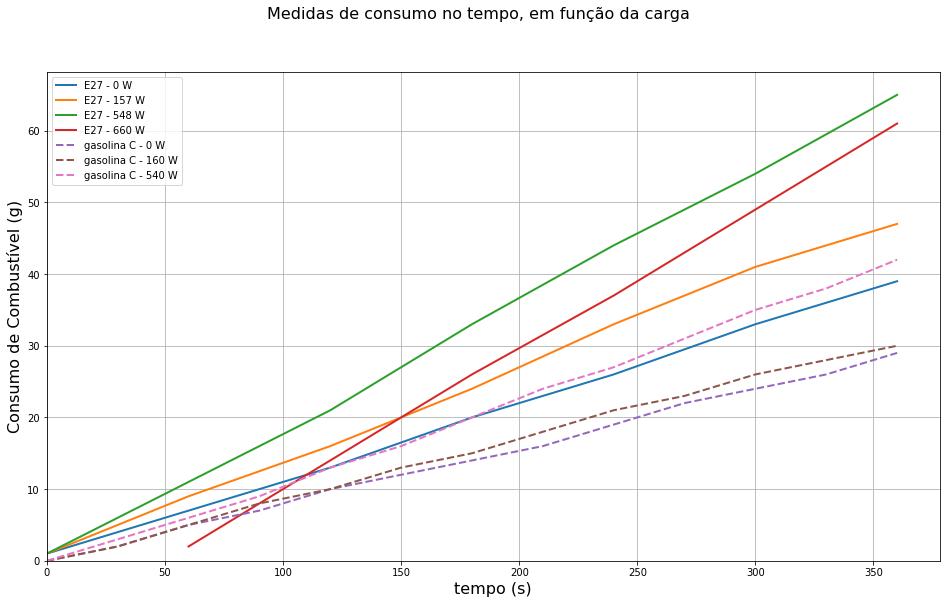

In [27]:
df_dict_2 = {}

Pot_list_2 = ["0", "157", "548", "660"]

for pot in Pot_list_2:

    df_dict_2[pot] = df_ensaio_2[df_ensaio_2['Pot_W'] == float(pot)]


fig = plt.figure(figsize=[16, 9])
fig.suptitle('Medidas de consumo no tempo, em função da carga', fontsize=16)
# Plotando 2D

ax = fig.add_subplot(1, 1, 1)

ax.set_ylabel('Consumo de Combustível (g)', fontsize=16)
ax.set_xlabel('tempo (s)', fontsize=16)

for key in df_dict_2:

        df = df_dict_2[key]

        ax.plot(df.tempo_s, df.massa_g, linewidth=2,label='E27 - {} W'.format(key))

for key in df_dict:

        df = df_dict[key]

        ax.plot(df.tempo_s, df.massa_g, '--' ,linewidth=2,label='gasolina C - {} W'.format(key))

ax.grid()
ax.legend()
ax.set_xlim(0)
ax.set_ylim(0)

plt.show()
fig.savefig('Figures/Consumo_etanois.png', bbox_inches='tight')

